# Petrol Price Forecasting

#### Dataset Description:

ONGCF is an organization that works in the oil and natural gas industries. There is information accessible on the pricing on a weekly basis. It intends to make a forecast on the price of crude oil for the subsequent 16 months, beginning on January 1, 2019, and continuing through April 2020. Create a price forecast using the most effective model available according to your preferences. Check for any extreme values or values that are missing.

Train.training data and a submission example are both accessible in csv format. The format of the file that must be uploaded is specified as csv.

In this particular instance, we will be judging the quality of your work based on the MAPE assessment criteria. Within the first one hundred eighty minutes of the exam, you are required to hand in the submission. Posted applications that won't be considered for acceptance. A maximum of 20 contributions may be submitted.

## TimeLine of the project:
- Data Analysis
- Model Construction and Predictions Utilizing Machine Learning Techniques
- Model Construction and Prediction Employing Auto Keras (Auto ML)


**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [2]:
df1 = pd.read_csv("train_data.csv")
df1.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


**Data Analysis and splitting the data**

In [3]:
df1.head()
df1.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [4]:
df2 = df1.dropna()

In [3]:
df2.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df2.head()

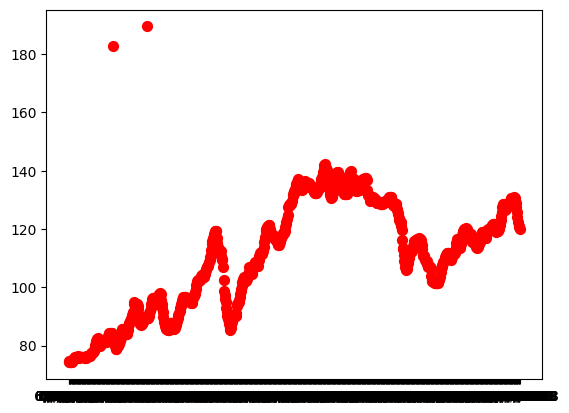

In [6]:
plt.scatter(df2.Date, df2.Petrol,color='red',label='Prices', s=50)

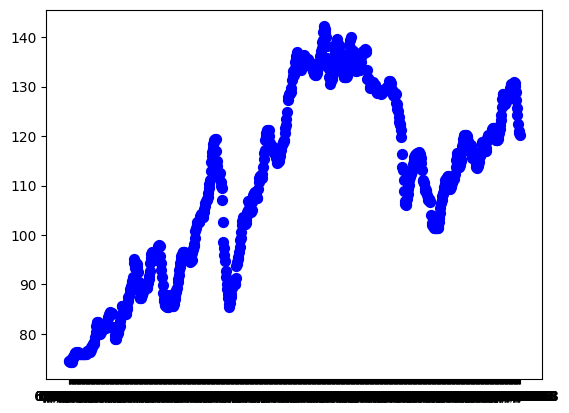

In [7]:
df3=df2[df2.Petrol<160]
plt.scatter(df3.Date, df3.Petrol,color='blue',label='Prices', s=50)


In [8]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df4=scaler.fit_transform(np.array(df4).reshape(-1,1))

In [10]:
df4

array([[0.00559152],
       [0.00382578],
       [0.00309005],
       [0.00206004],
       [0.00103002],
       [0.        ],
       [0.0126545 ],
       [0.01309594],
       [0.01339023],
       [0.01809888],
       [0.02354326],
       [0.02707475],
       [0.02825191],
       [0.02972337],
       [0.02928193],
       [0.0285462 ],
       [0.02751619],
       [0.03266627],
       [0.02486757],
       [0.02707475],
       [0.02633902],
       [0.02633902],
       [0.02545615],
       [0.02530901],
       [0.02663331],
       [0.02633902],
       [0.02589759],
       [0.02575044],
       [0.02516186],
       [0.02545615],
       [0.02457328],
       [0.02486757],
       [0.03163626],
       [0.03281342],
       [0.033402  ],
       [0.03369629],
       [0.03281342],
       [0.03193055],
       [0.03104768],
       [0.03708064],
       [0.04679223],
       [0.04752796],
       [0.04973514],
       [0.05370806],
       [0.05400235],
       [0.05635668],
       [0.06165391],
       [0.074

In [11]:
training_size=int(len(df4)*0.65)
test_size=len(df4)-training_size
train_data,test_data=df4[0:training_size,:],df4[training_size:len(df4),:1]

In [12]:
train_data.shape
test_data.shape

(284, 1)

**Data Preprocessing**

In [13]:
 import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
X_train

array([[0.00559152, 0.00382578, 0.00309005, ..., 0.16627428, 0.16524426,
        0.1640671 ],
       [0.00382578, 0.00309005, 0.00206004, ..., 0.16524426, 0.1640671 ,
        0.16274279],
       [0.00309005, 0.00206004, 0.00103002, ..., 0.1640671 , 0.16274279,
        0.15538552],
       ...,
       [0.91024132, 0.91597999, 0.90847557, ..., 0.88419659, 0.88655091,
        0.88743378],
       [0.91597999, 0.90847557, 0.88802237, ..., 0.88655091, 0.88743378,
        0.87154208],
       [0.90847557, 0.88802237, 0.88449088, ..., 0.88743378, 0.87154208,
        0.87639788]])

In [16]:
y_train

array([0.16274279, 0.15538552, 0.14670394, 0.14420247, 0.15862272,
       0.16642142, 0.18422602, 0.19540906, 0.19894055, 0.21100647,
       0.21762802, 0.22130665, 0.22748676, 0.2405827 , 0.24367275,
       0.2532372 , 0.29664509, 0.30694526, 0.29723367, 0.28134197,
       0.28399058, 0.29487934, 0.29326074, 0.283402  , 0.26868746,
       0.24014126, 0.21188935, 0.19334903, 0.19334903, 0.19114185,
       0.19643908, 0.20114773, 0.20335491, 0.21115362, 0.21777516,
       0.22572101, 0.23057681, 0.22836963, 0.22719247, 0.22645674,
       0.2230724 , 0.22572101, 0.23513832, 0.24941142, 0.25853443,
       0.27310182, 0.29458505, 0.31106533, 0.32254267, 0.32739847,
       0.32636845, 0.32210124, 0.31121248, 0.30944673, 0.31312537,
       0.31238964, 0.30547381, 0.30988817, 0.31606828, 0.33357858,
       0.34682166, 0.34755739, 0.35079459, 0.34741024, 0.316804  ,
       0.29708652, 0.27472042, 0.25412007, 0.22910536, 0.20585639,
       0.18746321, 0.18231313, 0.17216009, 0.16965862, 0.16759

In [17]:
print(X_train.shape), print(y_train.shape)

(424, 100)
(424,)


(None, None)

### LSTM 

In [18]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
7/7 [==============================] - 1s 172ms/step - loss: 0.1365 - val_loss: 0.0748
Epoch 2/10
7/7 [==============================] - 0s 32ms/step - loss: 0.0320 - val_loss: 0.0154
Epoch 3/10
7/7 [==============================] - 0s 29ms/step - loss: 0.0214 - val_loss: 0.0042
Epoch 4/10
7/7 [==============================] - 0s 26ms/step - loss: 0.0106 - val_loss: 0.0085
Epoch 5/10
7/7 [==============================] - 0s 27ms/step - loss: 0.0088 - val_loss: 0.0040
Epoch 6/10
7/7 [==============================] - 0s 28ms/step - loss: 0.0074 - val_loss: 0.0049
Epoch 7/10
7/7 [==============================] - 0s 28ms/step - loss: 0.0067 - val_loss: 0.0032
Epoch 8/10
7/7 [==============================] - 0s 27ms/step - loss: 0.0063 - val_loss: 0.0035
Epoch 9/10
7/7 [==============================] - 0s 27ms/step - loss: 0.0062 - val_loss: 0.0031
Epoch 10/10
7/7 [==============================] - 0s 32ms/step - loss: 0.0061 - val_loss: 0.0031


In [22]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [23]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

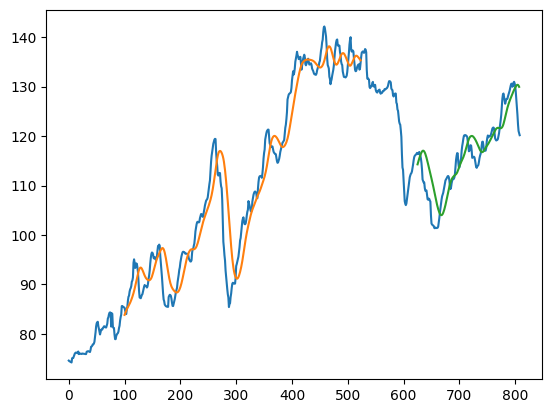

In [24]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df4)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df4))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [25]:
df_test=pd.read_csv("test_data.csv")
df_test.head()

,Date,Prediction
0,1/1/2019,NaN
1,1/2/2019,NaN
2,1/3/2019,NaN
3,1/4/2019,NaN
4,1/5/2019,NaN


In [26]:
model.save("prtrol price prediction")

INFO:tensorflow:Assets written to: prtrol price prediction\assets


INFO:tensorflow:Assets written to: prtrol price prediction\assets


### **Using ARIMA**

In [4]:
# !pip install --upgrade patsy

In [5]:
# !pip install statsmodels

In [6]:
# !pip install --upgrade --no-deps statsmodels

In [7]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import datetime 
from matplotlib import pyplot

from sklearn.metrics import mean_squared_error

from math import sqrt

In [31]:
df = pd.read_csv("train_data.csv")
df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [32]:
df.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [33]:
df2 = df.dropna()
df3=df2[df2.Petrol<160]
df3.head()


,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [34]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [35]:
model1 = ARIMA(df4.values, order=(5,1,0))
model_fit1 = model1.fit()
output1= model_fit1.forecast(steps=30)
output1

array([119.80670597, 119.52143349, 119.3063469 , 119.14818594,
       119.0292548 , 118.93899202, 118.87071709, 118.81917614,
       118.78030433, 118.75097704, 118.72884006, 118.71212995,
       118.69951742, 118.68999816, 118.68281356, 118.67739093,
       118.67329814, 118.67020907, 118.66787756, 118.66611783,
       118.66478967, 118.66378722, 118.66303062, 118.66245956,
       118.66202856, 118.66170325, 118.66145772, 118.66127241,
       118.66113254, 118.66102697])

### Using Auto ML

In [2]:
#!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf


import autokeras as ak

In [ ]:
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
)

In [ ]:
reg.fit(x=X_train, y=y_train, verbose=0)

In [ ]:

# evaluate the model
mae, _  = reg.evaluate(X_test, ytest, verbose=0)
#print('MAE: %.3f' % mae)
# use the model to make a prediction
yhat_test = reg.predict(X_test)

# get the best performing model
model = reg.export_model()


In [ ]:
# summarize the loaded model
model.summary()

In [ ]:
yhat_train= reg.predict(X_train)

In [ ]:
train_predict=scaler.inverse_transform(yhat_train)
test_predict=scaler.inverse_transform(yhat_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(ytest,yhat_test)

In [ ]:
mean_squared_error(y_train,yhat_train)